<a href="https://colab.research.google.com/github/Rafiryd/Rafiryd/blob/rafiryd/skripsi16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
#Referensi: https://www.linkedin.com/pulse/how-scrape-google-play-reviews-4-simple-steps-using-python-kundi/

!pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [163]:
from google_play_scraper import app

import pandas as pd

import numpy as np

import seaborn as sns

In [164]:
#Scrape desired number of reviews
#Run kode ini jika ingin scrape data dengan jumlah tertentu. Ganti (misal, ingin scrape sejumlah 1000, maka ganti kode , count = 1000 )

from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.bukalapak.android',
    lang='id', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT you can use Sort.NEWEST to get newst reviews
    count=1300, # defaults to 100
    filter_score_with=None # defaults to None(means all score) Use 1 or 2 or 3 or 4 or 5 to select certain score
)

In [165]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,3fa3eaee-9018-4e9a-8f90-a971e60a6aa2,Smoker Amild,https://play-lh.googleusercontent.com/a-/AD5-W...,Dari 5 star sekarang jadi 4.. Skrg jadi 2..Buk...,2,231,5.26.0,2022-12-20 05:19:25,"Hai, mohon maaf atas kendalanya. Mohon infokan...",2020-08-18 18:58:36
1,99ac25bb-686c-4009-8edd-016279b23fbb,Agroprobiotik Jawa Barat,https://play-lh.googleusercontent.com/a-/AD5-W...,Sy kesulitan ingin komplen masalah pembayaran ...,2,163,5.27.2,2022-12-30 03:49:00,None,NaT
2,fd03f2b4-530f-44ae-8321-49db511923f9,david james,https://play-lh.googleusercontent.com/a/AEdFTp...,Saya order dengan alamat pengiriman yg sudah s...,1,32,5.29.2,2023-02-02 16:24:21,None,NaT
3,c162506f-1395-419e-ae5b-48076e3349a0,Ryan Apriandi,https://play-lh.googleusercontent.com/a-/AD5-W...,"Aplikasi parah, saya belanja dengan CC pilih k...",1,217,5.27.3,2023-01-05 15:39:31,None,NaT
4,4526d532-8ff4-4040-bec9-080261606554,ipan koswara,https://play-lh.googleusercontent.com/a/AEdFTp...,"evalusi bl sangat cepat sy suka,bikin costumer...",5,2,5.29.2,2023-02-09 03:45:09,None,NaT


In [166]:
len(df_busu.index) #count the number of data we got

1300

In [167]:
df_busu[['userName', 'score','at', 'content']].tail()  #preview userName, rating, date-time, and reviews only

,userName,score,at,content
1295,Rusly Alfhamora,2,2021-11-23 07:16:25,Sengaja kasih dua bintang dulu biar ada tangga...
1296,Budi Sulistantyo,3,2022-12-09 02:57:32,Parah terlalu banyak iklan
1297,Pengguna Google,4,2019-06-03 04:35:18,apk sangat tidak setabil. fitur2 sangat lambat...
1298,Auliya As,5,2022-10-08 13:35:17,Sangat suka cara penjuslan brang nya juga saya...
1299,Naeli Arofatul,5,2023-01-11 08:01:38,Mantap pengiriman cepat


In [168]:
name_dataframe = df_busu.loc[:,["userName", "score", "at", "content"]]
name_dataframe.rename(columns={"userName": "Nama pengguna", "score":"Rating", "at": "Date", "content": "Ulasan"}, inplace=True)

In [169]:
name_dataframe.tail()

,Nama pengguna,Rating,Date,Ulasan
1295,Rusly Alfhamora,2,2021-11-23 07:16:25,Sengaja kasih dua bintang dulu biar ada tangga...
1296,Budi Sulistantyo,3,2022-12-09 02:57:32,Parah terlalu banyak iklan
1297,Pengguna Google,4,2019-06-03 04:35:18,apk sangat tidak setabil. fitur2 sangat lambat...
1298,Auliya As,5,2022-10-08 13:35:17,Sangat suka cara penjuslan brang nya juga saya...
1299,Naeli Arofatul,5,2023-01-11 08:01:38,Mantap pengiriman cepat


In [170]:
name_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Nama pengguna  1300 non-null   object        
 1   Rating         1300 non-null   int64         
 2   Date           1300 non-null   datetime64[ns]
 3   Ulasan         1300 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 40.8+ KB


In [171]:
import nltk

In [172]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [173]:
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].astype(str)
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan
0,Smoker Amild,2,2022-12-20 05:19:25,Dari 5 star sekarang jadi 4.. Skrg jadi 2..Buk...
1,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,Sy kesulitan ingin komplen masalah pembayaran ...
2,david james,1,2023-02-02 16:24:21,Saya order dengan alamat pengiriman yg sudah s...
3,Ryan Apriandi,1,2023-01-05 15:39:31,"Aplikasi parah, saya belanja dengan CC pilih k..."
4,ipan koswara,5,2023-02-09 03:45:09,"evalusi bl sangat cepat sy suka,bikin costumer..."


In [174]:
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].str.lower()

In [175]:
import string 
import re 
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

def remove_links(text):
    # menghapus tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # menghapus non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # menghapus mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # menghapus URL
    return text.replace("http://", " ").replace("https://", " ")
                
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_links)

In [176]:
#menghapus number
def remove_number(text):
    return  re.sub(r"\d+", " ", text)

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_number)

In [177]:
#menghapus punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_punctuation)

In [178]:
# menghapus single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", " ", text)

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_singl_char)

In [179]:
# Tokenisasi 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

name_dataframe['Ulasan_tokenize'] = name_dataframe['Ulasan'].apply(word_tokenize_wrapper)

In [144]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize
0,Smoker Amild,2,2022-12-20 05:19:25,dari star sekarang jadi skrg jadi bukan m...,"[dari, star, sekarang, jadi, skrg, jadi, bukan..."
1,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba..."
2,david james,1,2023-02-02 16:24:21,saya order dengan alamat pengiriman yg sudah s...,"[saya, order, dengan, alamat, pengiriman, yg, ..."
3,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p..."
4,ipan koswara,5,2023-02-09 03:45:09,evalusi bl sangat cepat sy sukabikin costumers...,"[evalusi, bl, sangat, cepat, sy, sukabikin, co..."
...,...,...,...,...,...
1295,Rusly Alfhamora,2,2021-11-23 07:16:25,sengaja kasih dua bintang dulu biar ada tangga...,"[sengaja, kasih, dua, bintang, dulu, biar, ada..."
1296,Budi Sulistantyo,3,2022-12-09 02:57:32,parah terlalu banyak iklan,"[parah, terlalu, banyak, iklan]"
1297,Pengguna Google,4,2019-06-03 04:35:18,apk sangat tidak setabil fitur sangat lambat ...,"[apk, sangat, tidak, setabil, fitur, sangat, l..."
1298,Auliya As,5,2022-10-08 13:35:17,sangat suka cara penjuslan brang nya juga saya...,"[sangat, suka, cara, penjuslan, brang, nya, ju..."


In [145]:
name_dataframe.columns

Index(['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize'], dtype='object')

In [180]:
#Run This Code to Sort the Data By Date 
# tanggal 26-04-2022 sampai 12-10-2022

new_df = name_dataframe[['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize']]
sorted_df = new_df.sort_values(by='Date', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize
873,Nurochman Nuy,1,2023-02-15 12:45:40,di live chat malah diem aja dimenu buka bantua...,"[di, live, chat, malah, diem, aja, dimenu, buk..."
1166,Erry Anto,2,2023-02-15 10:12:15,gimana nih sudah update tidak ada notif buat p...,"[gimana, nih, sudah, update, tidak, ada, notif..."
149,Waris Mumin,4,2023-02-15 08:04:30,segala kebutuhan jadi mudah dan murah tapi kal...,"[segala, kebutuhan, jadi, mudah, dan, murah, t..."
17,Syamsu Alam,5,2023-02-15 06:07:02,saya beri ranting tp klu masih ribet saya ak...,"[saya, beri, ranting, tp, klu, masih, ribet, s..."
913,yanzoe amurwabhumi,2,2023-02-15 05:35:16,proses pemesanan dan pengiriman lamaaaagak kay...,"[proses, pemesanan, dan, pengiriman, lamaaaaga..."


In [147]:
sorted_df.dtypes

Nama pengguna              object
Rating                      int64
Date               datetime64[ns]
Ulasan                     object
Ulasan_tokenize            object
dtype: object

In [181]:
# Menghitung Distibusi Persebaran Kata
def freqDist_wrapper(text):
    return FreqDist(text)

Ulasan_fqsist = name_dataframe['Ulasan_tokenize'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(Ulasan_fqsist.head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(jadi, 2), (dari, 1), (star, 1), (sekarang, 1...
1    [(ingin, 3), (komplen, 3), (sy, 2), (pembayara...
2    [(order, 4), (saya, 2), (alamat, 2), (pelapak,...
3    [(di, 3), (saya, 2), (belanja, 2), (cicilan, 2...
4    [(bl, 2), (cepat, 2), (sy, 2), (nya, 2), (eval...
Name: Ulasan_tokenize, dtype: object


In [182]:
name_dataframe['Ulasan_tokenize'].unique

<bound method Series.unique of 0       [dari, star, sekarang, jadi, skrg, jadi, bukan...
1       [sy, kesulitan, ingin, komplen, masalah, pemba...
2       [saya, order, dengan, alamat, pengiriman, yg, ...
3       [aplikasi, parah, saya, belanja, dengan, cc, p...
4       [evalusi, bl, sangat, cepat, sy, sukabikin, co...
                              ...                        
1295    [sengaja, kasih, dua, bintang, dulu, biar, ada...
1296                      [parah, terlalu, banyak, iklan]
1297    [apk, sangat, tidak, setabil, fitur, sangat, l...
1298    [sangat, suka, cara, penjuslan, brang, nya, ju...
1299                          [mantap, pengiriman, cepat]
Name: Ulasan_tokenize, Length: 1300, dtype: object>

In [183]:
slank_word_dict = {
    "berjalansudah" : "berjalan",
    "paraah" : "parah",
    "keduakali" : "",
    "keduakali" : "kedua kali",
    "agak" : "sedikit",
    "pas" : "saat",
    "produkx" : "produknya",
    "sukamkasih" : "suka makasih",
    "gak" : "tidak",
    "cpt" : "cepat",
    "sdh" : "sudah",
    "recommend" : "rekomendasi",
    "bagusseller" : "bagus",
    "bagusssss" : "bagus",
    "bagussssss" : "bagus",
    "baguuussss" : "bagus",
    "cepatmakasih": "cepat",
    "cepatmantappp": "cepat",
    "cepatproduct": "cepat",
    "cepatrecomended": "cepat",
    "cepattoko": "cepat",
    "recomended": "rekomendasi",
    "recommended": "rekomendasi",
    "rekomendasi": "rekomendasi",
    "rekomended": "rekomendasi",
    }

def slank_normalized_term(document):
    return [slank_word_dict[term] if term in slank_word_dict else term for term in document]

In [184]:
def convertToSlangword(ulasan):
    kamusSlang = eval(open("slangwords.txt").read())
    pattern = re.compile(r'\b( ' + '|'.join (kamusSlang.keys())+r')\b')
    content = []
    for kata in ulasan:
        filterSlang = pattern.sub(lambda x: kamusSlang[x.group()],kata)
        content.append(filterSlang.lower())
    ulasan = content
    return ulasan

name_dataframe['Ulasan_normalized'] = name_dataframe['Ulasan_tokenize'].apply(convertToSlangword)

In [151]:
normalizad_word = pd.read_csv("/content/kamusindonesia.csv.csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

In [152]:
name_dataframe['Ulasan_normalized'] = name_dataframe['Ulasan_tokenize'].apply(normalized_term).apply(slank_normalized_term)

In [185]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized
0,Smoker Amild,2,2022-12-20 05:19:25,dari star sekarang jadi skrg jadi bukan m...,"[dari, star, sekarang, jadi, skrg, jadi, bukan...","[dari, star, sekarang, jadi, sekarang, jadi, b..."
1,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[saya, kesulitan, ingin, komplain, masalah, pe..."
2,david james,1,2023-02-02 16:24:21,saya order dengan alamat pengiriman yg sudah s...,"[saya, order, dengan, alamat, pengiriman, yg, ...","[saya, order, dengan, alamat, pengiriman, yang..."
3,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p..."
4,ipan koswara,5,2023-02-09 03:45:09,evalusi bl sangat cepat sy sukabikin costumers...,"[evalusi, bl, sangat, cepat, sy, sukabikin, co...","[evalusi, beli, sangat, cepat, saya, sukabikin..."
...,...,...,...,...,...,...
1295,Rusly Alfhamora,2,2021-11-23 07:16:25,sengaja kasih dua bintang dulu biar ada tangga...,"[sengaja, kasih, dua, bintang, dulu, biar, ada...","[sengaja, kasih, dua, bintang, dulu, biar, ada..."
1296,Budi Sulistantyo,3,2022-12-09 02:57:32,parah terlalu banyak iklan,"[parah, terlalu, banyak, iklan]","[parah, terlalu, banyak, iklan]"
1297,Pengguna Google,4,2019-06-03 04:35:18,apk sangat tidak setabil fitur sangat lambat ...,"[apk, sangat, tidak, setabil, fitur, sangat, l...","[aplikasi, sangat, tidak, setabil, fitur, sang..."
1298,Auliya As,5,2022-10-08 13:35:17,sangat suka cara penjuslan brang nya juga saya...,"[sangat, suka, cara, penjuslan, brang, nya, ju...","[sangat, suka, cara, penjuslan, brang, nya, ju..."


In [187]:
name_dataframe['Ulasan_normalized'].unique

<bound method Series.unique of 0       [dari, star, sekarang, jadi, sekarang, jadi, b...
1       [saya, kesulitan, ingin, komplain, masalah, pe...
2       [saya, order, dengan, alamat, pengiriman, yang...
3       [aplikasi, parah, saya, belanja, dengan, cc, p...
4       [evalusi, beli, sangat, cepat, saya, sukabikin...
                              ...                        
1295    [sengaja, kasih, dua, bintang, dulu, biar, ada...
1296                      [parah, terlalu, banyak, iklan]
1297    [aplikasi, sangat, tidak, setabil, fitur, sang...
1298    [sangat, suka, cara, penjuslan, brang, nya, ju...
1299                          [mantap, pengiriman, cepat]
Name: Ulasan_normalized, Length: 1300, dtype: object>

In [188]:
from nltk.corpus import stopwords

In [189]:
list_stopwords = stopwords.words('indonesian')

In [190]:
#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

name_dataframe['Ulasan_stop_removed'] = name_dataframe['Ulasan_normalized'].apply(stopwords_removal) 

In [191]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed
0,Smoker Amild,2,2022-12-20 05:19:25,dari star sekarang jadi skrg jadi bukan m...,"[dari, star, sekarang, jadi, skrg, jadi, bukan...","[dari, star, sekarang, jadi, sekarang, jadi, b...","[star, bagusmalah, menurunupdate, terbaru, ber..."
1,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[saya, kesulitan, ingin, komplain, masalah, pe...","[kesulitan, komplain, pembayaran, paylater, no..."
2,david james,1,2023-02-02 16:24:21,saya order dengan alamat pengiriman yg sudah s...,"[saya, order, dengan, alamat, pengiriman, yg, ...","[saya, order, dengan, alamat, pengiriman, yang...","[order, alamat, pengiriman, lakukan, pelapak, ..."
3,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, belanja, cc, pilih, klik, ci..."
4,ipan koswara,5,2023-02-09 03:45:09,evalusi bl sangat cepat sy sukabikin costumers...,"[evalusi, bl, sangat, cepat, sy, sukabikin, co...","[evalusi, beli, sangat, cepat, saya, sukabikin...","[evalusi, beli, cepat, sukabikin, costumers, n..."
...,...,...,...,...,...,...,...
1295,Rusly Alfhamora,2,2021-11-23 07:16:25,sengaja kasih dua bintang dulu biar ada tangga...,"[sengaja, kasih, dua, bintang, dulu, biar, ada...","[sengaja, kasih, dua, bintang, dulu, biar, ada...","[sengaja, kasih, bintang, biar, tanggapan, pak..."
1296,Budi Sulistantyo,3,2022-12-09 02:57:32,parah terlalu banyak iklan,"[parah, terlalu, banyak, iklan]","[parah, terlalu, banyak, iklan]","[parah, iklan]"
1297,Pengguna Google,4,2019-06-03 04:35:18,apk sangat tidak setabil fitur sangat lambat ...,"[apk, sangat, tidak, setabil, fitur, sangat, l...","[aplikasi, sangat, tidak, setabil, fitur, sang...","[aplikasi, setabil, fitur, lambat, performanya..."
1298,Auliya As,5,2022-10-08 13:35:17,sangat suka cara penjuslan brang nya juga saya...,"[sangat, suka, cara, penjuslan, brang, nya, ju...","[sangat, suka, cara, penjuslan, brang, nya, ju...","[suka, penjuslan, brang, nya, suka, cuman, fit..."


In [192]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [193]:
pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [195]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in name_dataframe['Ulasan_stop_removed']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

name_dataframe['Ulasan_Stemmed'] = name_dataframe['Ulasan_stop_removed'].swifter.apply(get_stemmed_term)

4458
------------------------
star : star
bagusmalah : bagusmalah
menurunupdate : menurunupdate
terbaru : baru
berpengaruhhapus : berpengaruhhapus
cacheclear : cacheclear
datasama : datasama
ajaaplikasi : ajaaplikasi
berat : berat
menunggu : tunggu
nonton : nonton
streaming : streaming
hd : hd
lancar : lancar
jaya : jaya
kesulitan : sulit
komplain : komplain
pembayaran : bayar
paylater : paylater
no : no
watelpon : watelpon
susah : susah
aktif : aktif
membingunkan : membingunkan
masuk : masuk
order : order
alamat : alamat
pengiriman : kirim
lakukan : laku
pelapak : lapak
bilang : bilang
kode : kode
booking : booking
muncul : muncul
alasan : alas
muncultdk : muncultdk
tercantum : cantum
disuruh : suruh
ulang : ulang
bermasalah : masalah
gmn : gmn
suruh : suruh
nyangkut : nyangkut
langsung : langsung
pesan : pesan
ga : ga
ig : ig
resmi : resmi
respon : respon
kesalahan : salah
sistem : sistem
merepotkan : repot
konsumen : konsumen
aplikasi : aplikasi
parah : parah
belanja : belanja
cc : 

Pandas Apply:   0%|          | 0/1300 [00:00<?, ?it/s]

In [196]:
name_dataframe["Ulasan_clean"] = [' '.join(map(str, l)) for l in name_dataframe['Ulasan_Stemmed']]


In [197]:
name_dataframe.to_excel("tokped_text.xlsx")

In [198]:
ulasan = ' '.join(str(v) for v in name_dataframe['Ulasan_clean'])

In [199]:
tokenize_ulasan = word_tokenize(ulasan)

In [200]:
tokenize_ulasan

['star',
 'bagusmalah',
 'menurunupdate',
 'baru',
 'berpengaruhhapus',
 'cacheclear',
 'datasama',
 'ajaaplikasi',
 'berat',
 'tunggu',
 'nonton',
 'streaming',
 'hd',
 'lancar',
 'jaya',
 'sulit',
 'komplain',
 'bayar',
 'paylater',
 'no',
 'watelpon',
 'susah',
 'aktif',
 'membingunkan',
 'komplain',
 'komplain',
 'paylater',
 'bayar',
 'masuk',
 'order',
 'alamat',
 'kirim',
 'laku',
 'lapak',
 'bilang',
 'kode',
 'booking',
 'muncul',
 'alas',
 'alamat',
 'muncultdk',
 'cantum',
 'suruh',
 'order',
 'ulang',
 'order',
 'masalah',
 'gmn',
 'suruh',
 'order',
 'ulang',
 'nyangkut',
 'gmn',
 'langsung',
 'pesan',
 'ga',
 'ig',
 'resmi',
 'no',
 'respon',
 'salah',
 'sistem',
 'repot',
 'lapak',
 'konsumen',
 'aplikasi',
 'parah',
 'belanja',
 'cc',
 'pilih',
 'klik',
 'cicil',
 'tagih',
 'penuh',
 'confirmasi',
 'urus',
 'teman',
 'belanja',
 'metode',
 'cicil',
 'korban',
 'kabar',
 'bukalapak',
 'evalusi',
 'beli',
 'cepat',
 'sukabikin',
 'costumers',
 'nya',
 'nyaman',
 'segi',
 

In [201]:
fqdist = FreqDist(tokenize_ulasan)

In [204]:
fqdist

FreqDist({'bukalapak': 580, 'aplikasi': 526, 'nya': 378, 'barang': 367, 'kirim': 329, 'beli': 310, 'gak': 295, 'pesan': 294, 'bayar': 279, 'ga': 259, ...})

In [205]:
# mencetak 15 kata paling banyak digunakan
fqdist.most_common(15)

[('bukalapak', 580),
 ('aplikasi', 526),
 ('nya', 378),
 ('barang', 367),
 ('kirim', 329),
 ('beli', 310),
 ('gak', 295),
 ('pesan', 294),
 ('bayar', 279),
 ('ga', 259),
 ('buka', 244),
 ('pakai', 225),
 ('belanja', 222),
 ('lapak', 195),
 ('jual', 194)]

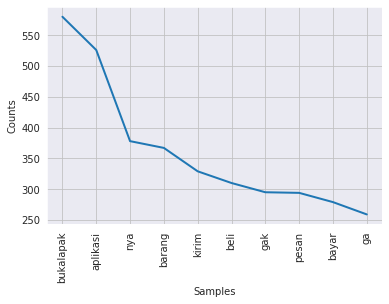

In [206]:
import matplotlib.pyplot as plt

# plotting
fqdist.plot(10,cumulative=False)
plt.show()

In [207]:
label = []
for index, row in name_dataframe.iterrows():
    if row["Rating"] == 5 or row["Rating"] == 4:
        label.append(1)
    else:
        label.append(0)

name_dataframe["label"] = label

name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label
0,Smoker Amild,2,2022-12-20 05:19:25,dari star sekarang jadi skrg jadi bukan m...,"[dari, star, sekarang, jadi, skrg, jadi, bukan...","[dari, star, sekarang, jadi, sekarang, jadi, b...","[star, bagusmalah, menurunupdate, terbaru, ber...","[star, bagusmalah, menurunupdate, baru, berpen...",star bagusmalah menurunupdate baru berpengaruh...,0
1,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[saya, kesulitan, ingin, komplain, masalah, pe...","[kesulitan, komplain, pembayaran, paylater, no...","[sulit, komplain, bayar, paylater, no, watelpo...",sulit komplain bayar paylater no watelpon susa...,0
2,david james,1,2023-02-02 16:24:21,saya order dengan alamat pengiriman yg sudah s...,"[saya, order, dengan, alamat, pengiriman, yg, ...","[saya, order, dengan, alamat, pengiriman, yang...","[order, alamat, pengiriman, lakukan, pelapak, ...","[order, alamat, kirim, laku, lapak, bilang, ko...",order alamat kirim laku lapak bilang kode book...,0
3,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, belanja, cc, pilih, klik, ci...","[aplikasi, parah, belanja, cc, pilih, klik, ci...",aplikasi parah belanja cc pilih klik cicil tag...,0
4,ipan koswara,5,2023-02-09 03:45:09,evalusi bl sangat cepat sy sukabikin costumers...,"[evalusi, bl, sangat, cepat, sy, sukabikin, co...","[evalusi, beli, sangat, cepat, saya, sukabikin...","[evalusi, beli, cepat, sukabikin, costumers, n...","[evalusi, beli, cepat, sukabikin, costumers, n...",evalusi beli cepat sukabikin costumers nya nya...,1
...,...,...,...,...,...,...,...,...,...,...
1295,Rusly Alfhamora,2,2021-11-23 07:16:25,sengaja kasih dua bintang dulu biar ada tangga...,"[sengaja, kasih, dua, bintang, dulu, biar, ada...","[sengaja, kasih, dua, bintang, dulu, biar, ada...","[sengaja, kasih, bintang, biar, tanggapan, pak...","[sengaja, kasih, bintang, biar, tanggap, pakai...",sengaja kasih bintang biar tanggap pakai app b...,0
1296,Budi Sulistantyo,3,2022-12-09 02:57:32,parah terlalu banyak iklan,"[parah, terlalu, banyak, iklan]","[parah, terlalu, banyak, iklan]","[parah, iklan]","[parah, iklan]",parah iklan,0
1297,Pengguna Google,4,2019-06-03 04:35:18,apk sangat tidak setabil fitur sangat lambat ...,"[apk, sangat, tidak, setabil, fitur, sangat, l...","[aplikasi, sangat, tidak, setabil, fitur, sang...","[aplikasi, setabil, fitur, lambat, performanya...","[aplikasi, setabil, fitur, lambat, performa, e...",aplikasi setabil fitur lambat performa engga b...,1
1298,Auliya As,5,2022-10-08 13:35:17,sangat suka cara penjuslan brang nya juga saya...,"[sangat, suka, cara, penjuslan, brang, nya, ju...","[sangat, suka, cara, penjuslan, brang, nya, ju...","[suka, penjuslan, brang, nya, suka, cuman, fit...","[suka, penjuslan, brang, nya, suka, cuman, fit...",suka penjuslan brang nya suka cuman fituruntuk...,1


In [208]:
#create a user define function to find out polarity & subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#creating another user define function to label the sentiment 

def getSentiment(value):
    if value<0:
        return 'Negative'
    elif value==0:
        return 'Neutral'
    else:
        return 'Positive'

In [209]:
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label
0,Smoker Amild,2,2022-12-20 05:19:25,dari star sekarang jadi skrg jadi bukan m...,"[dari, star, sekarang, jadi, skrg, jadi, bukan...","[dari, star, sekarang, jadi, sekarang, jadi, b...","[star, bagusmalah, menurunupdate, terbaru, ber...","[star, bagusmalah, menurunupdate, baru, berpen...",star bagusmalah menurunupdate baru berpengaruh...,0
1,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[saya, kesulitan, ingin, komplain, masalah, pe...","[kesulitan, komplain, pembayaran, paylater, no...","[sulit, komplain, bayar, paylater, no, watelpo...",sulit komplain bayar paylater no watelpon susa...,0
2,david james,1,2023-02-02 16:24:21,saya order dengan alamat pengiriman yg sudah s...,"[saya, order, dengan, alamat, pengiriman, yg, ...","[saya, order, dengan, alamat, pengiriman, yang...","[order, alamat, pengiriman, lakukan, pelapak, ...","[order, alamat, kirim, laku, lapak, bilang, ko...",order alamat kirim laku lapak bilang kode book...,0
3,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, belanja, cc, pilih, klik, ci...","[aplikasi, parah, belanja, cc, pilih, klik, ci...",aplikasi parah belanja cc pilih klik cicil tag...,0
4,ipan koswara,5,2023-02-09 03:45:09,evalusi bl sangat cepat sy sukabikin costumers...,"[evalusi, bl, sangat, cepat, sy, sukabikin, co...","[evalusi, beli, sangat, cepat, saya, sukabikin...","[evalusi, beli, cepat, sukabikin, costumers, n...","[evalusi, beli, cepat, sukabikin, costumers, n...",evalusi beli cepat sukabikin costumers nya nya...,1


In [210]:
from textblob import TextBlob


In [211]:
def run_vader(name_dataframe):
    # Generate VADER sentiment analyzer object
    sid = SentimentIntensityAnalyzer()

In [212]:
name_dataframe['Polarity']=name_dataframe['Ulasan_clean'].apply(getPolarity)
name_dataframe['Subjectivity']=name_dataframe['Ulasan_clean'].apply(getSubjectivity)
name_dataframe['Sentiment']=name_dataframe['Polarity'].apply(getSentiment)
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label,Polarity,Subjectivity,Sentiment
0,Smoker Amild,2,2022-12-20 05:19:25,dari star sekarang jadi skrg jadi bukan m...,"[dari, star, sekarang, jadi, skrg, jadi, bukan...","[dari, star, sekarang, jadi, sekarang, jadi, b...","[star, bagusmalah, menurunupdate, terbaru, ber...","[star, bagusmalah, menurunupdate, baru, berpen...",star bagusmalah menurunupdate baru berpengaruh...,0,0.0,0.0,Neutral
1,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[saya, kesulitan, ingin, komplain, masalah, pe...","[kesulitan, komplain, pembayaran, paylater, no...","[sulit, komplain, bayar, paylater, no, watelpo...",sulit komplain bayar paylater no watelpon susa...,0,0.0,0.0,Neutral
2,david james,1,2023-02-02 16:24:21,saya order dengan alamat pengiriman yg sudah s...,"[saya, order, dengan, alamat, pengiriman, yg, ...","[saya, order, dengan, alamat, pengiriman, yang...","[order, alamat, pengiriman, lakukan, pelapak, ...","[order, alamat, kirim, laku, lapak, bilang, ko...",order alamat kirim laku lapak bilang kode book...,0,-0.4,1.0,Negative
3,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, belanja, cc, pilih, klik, ci...","[aplikasi, parah, belanja, cc, pilih, klik, ci...",aplikasi parah belanja cc pilih klik cicil tag...,0,0.0,0.0,Neutral
4,ipan koswara,5,2023-02-09 03:45:09,evalusi bl sangat cepat sy sukabikin costumers...,"[evalusi, bl, sangat, cepat, sy, sukabikin, co...","[evalusi, beli, sangat, cepat, saya, sukabikin...","[evalusi, beli, cepat, sukabikin, costumers, n...","[evalusi, beli, cepat, sukabikin, costumers, n...",evalusi beli cepat sukabikin costumers nya nya...,1,0.0,0.0,Neutral


In [ ]:
name_dataframe

In [213]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_pos = name_dataframe[ name_dataframe['Sentiment'] == 'Positive']
train_pos = train_pos['Ulasan_clean']
train_neg = name_dataframe[ name_dataframe['Sentiment'] == 'Negative']
train_neg = train_neg['Ulasan_clean']
train_net = name_dataframe[ name_dataframe['Sentiment'] == 'Neutral']
train_net = train_net['Ulasan_clean']

def wordcloud_draw(data, color = '#FAFAD2'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and not word.startswith('nya')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)
print("Neutral words")
wordcloud_draw(train_net,'#ccd5ae')

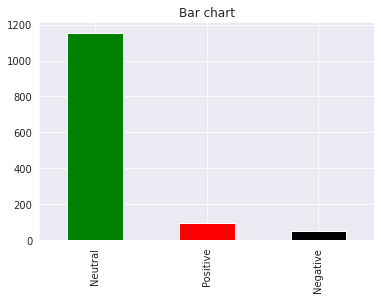

In [214]:
sentimen_data=pd.value_counts(name_dataframe["Sentiment"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["green", "red", "black"])
plt.title('Bar chart')
plt.show()

In [215]:
name_dataframe["Sentiment"].value_counts()

Neutral     1155
Positive      94
Negative      51
Name: Sentiment, dtype: int64

In [216]:
name_dataframe["Sentiment"].value_counts()

Neutral     1155
Positive      94
Negative      51
Name: Sentiment, dtype: int64

In [217]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [218]:
Ulasan = name_dataframe['Ulasan_clean']

In [219]:
Ulasan.isnull().sum()

0

In [220]:
#untuk menghitung jumlah kata yang telah di steming
cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print (len(term_fit.vocabulary_))

3564


In [221]:
term_fit.vocabulary_ #mengurutkan berdasarkan urutab abjad kata 

{'star': 3094,
 'bagusmalah': 231,
 'menurunupdate': 1987,
 'baru': 298,
 'berpengaruhhapus': 411,
 'cacheclear': 607,
 'datasama': 751,
 'ajaaplikasi': 45,
 'berat': 376,
 'tunggu': 3389,
 'nonton': 2185,
 'streaming': 3104,
 'hd': 1207,
 'lancar': 1720,
 'jaya': 1356,
 'sulit': 3117,
 'komplain': 1586,
 'bayar': 314,
 'paylater': 2378,
 'no': 2171,
 'watelpon': 3517,
 'susah': 3130,
 'aktif': 73,
 'membingunkan': 1955,
 'masuk': 1923,
 'order': 2299,
 'alamat': 88,
 'kirim': 1557,
 'laku': 1703,
 'lapak': 1736,
 'bilang': 434,
 'kode': 1569,
 'booking': 489,
 'muncul': 2072,
 'alas': 93,
 'muncultdk': 2073,
 'cantum': 617,
 'suruh': 3128,
 'ulang': 3413,
 'masalah': 1915,
 'gmn': 1124,
 'nyangkut': 2233,
 'langsung': 1730,
 'pesan': 2489,
 'ga': 1062,
 'ig': 1247,
 'resmi': 2698,
 'respon': 2701,
 'salah': 2770,
 'sistem': 3034,
 'repot': 2694,
 'konsumen': 1610,
 'aplikasi': 169,
 'parah': 2348,
 'belanja': 341,
 'cc': 630,
 'pilih': 2506,
 'klik': 1562,
 'cicil': 666,
 'tagih': 315

In [222]:
#kolom pertama ini berarti jumlah dokumen
#kolom kedua berarti letak katanya
#kolom ketiga hasil dari tf

term_frequency_all = term_fit.transform(Ulasan)
print (term_frequency_all)

  (0, 45)	1
  (0, 231)	1
  (0, 298)	1
  (0, 376)	1
  (0, 411)	1
  (0, 607)	1
  (0, 751)	1
  (0, 1207)	1
  (0, 1356)	1
  (0, 1720)	1
  (0, 1987)	1
  (0, 2185)	1
  (0, 3094)	1
  (0, 3104)	1
  (0, 3389)	1
  (1, 73)	1
  (1, 314)	2
  (1, 1586)	3
  (1, 1923)	1
  (1, 1955)	1
  (1, 2171)	1
  (1, 2378)	2
  (1, 3117)	1
  (1, 3130)	1
  (1, 3517)	1
  :	:
  (1297, 1455)	1
  (1297, 1525)	1
  (1297, 1714)	1
  (1297, 1938)	1
  (1297, 2048)	1
  (1297, 2225)	1
  (1297, 2470)	1
  (1297, 2966)	1
  (1297, 2972)	1
  (1297, 3028)	1
  (1297, 3112)	1
  (1297, 3235)	1
  (1297, 3296)	1
  (1298, 500)	1
  (1298, 711)	1
  (1298, 1051)	1
  (1298, 1557)	1
  (1298, 1657)	1
  (1298, 2209)	1
  (1298, 2362)	1
  (1298, 2457)	1
  (1298, 3112)	2
  (1299, 642)	1
  (1299, 1557)	1
  (1299, 1896)	1


In [223]:
ulasan_tf = Ulasan[1] #memanggil kata pada index ke 1
print (ulasan_tf)

sulit komplain bayar paylater no watelpon susah aktif membingunkan komplain komplain paylater bayar masuk


In [224]:
term_frequency = term_fit.transform([ulasan_tf]) #hanya menampilkan hasil document 1
print (term_frequency)

  (0, 73)	1
  (0, 314)	2
  (0, 1586)	3
  (0, 1923)	1
  (0, 1955)	1
  (0, 2171)	1
  (0, 2378)	2
  (0, 3117)	1
  (0, 3130)	1
  (0, 3517)	1


In [225]:
dokumen = term_fit.transform(Ulasan) #hasil perhitungan tf idf dalam 1 doc
tfidf_transformer = TfidfTransformer().fit(dokumen)
print (tfidf_transformer.idf_)

tfidf=tfidf_transformer.transform(term_frequency)
print (tfidf) #hasil manual dengan sistem pyhton

[7.4777413  7.4777413  6.78459412 ... 7.07227619 7.4777413  7.4777413 ]
  (0, 3517)	0.37601016105358415
  (0, 3130)	0.18459624088398907
  (0, 3117)	0.2151683311259674
  (0, 2378)	0.37031615652215866
  (0, 2171)	0.2306709326840708
  (0, 1955)	0.37601016105358415
  (0, 1923)	0.17140353664265112
  (0, 1586)	0.5235171937853087
  (0, 314)	0.2951109601149314
  (0, 73)	0.23659352567597638


In [226]:
data_label = name_dataframe[["Nama pengguna", "Ulasan_clean", "Sentiment"]]

In [227]:
data_label["Ulasan_clean"] = data_label["Ulasan_clean"].fillna("tidak ada komentar")

<ipython-input-227-5732072d6cca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label["Ulasan_clean"] = data_label["Ulasan_clean"].fillna("tidak ada komentar")


In [228]:
data_label.to_excel("data_label.xlsx")

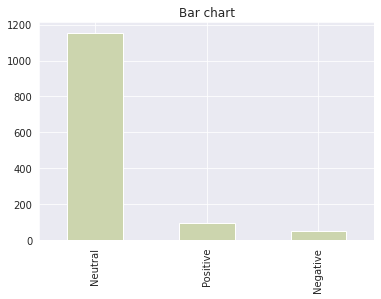

In [229]:
sentimen_data=pd.value_counts(data_label["Sentiment"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["#ccd5ae"])
plt.title('Bar chart')
plt.show()

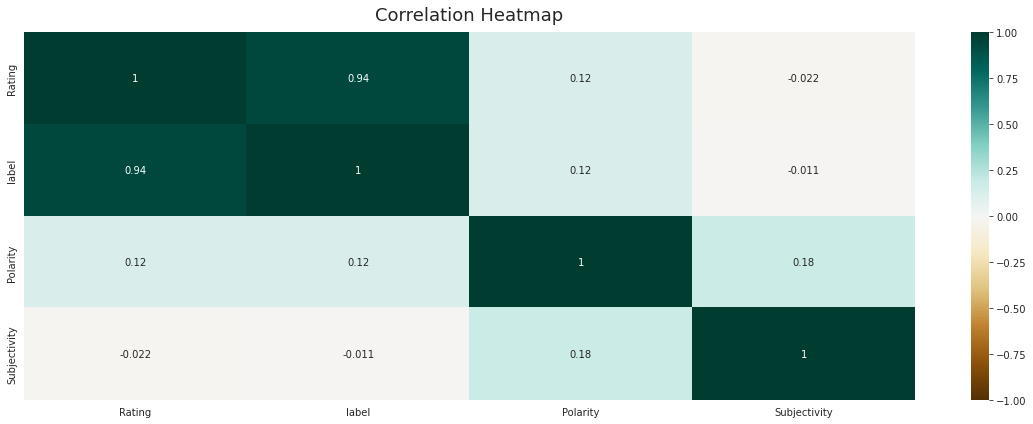

In [230]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(name_dataframe.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

plt.tight_layout()

In [231]:
name_dataframe.columns

Index(['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize',
       'Ulasan_normalized', 'Ulasan_stop_removed', 'Ulasan_Stemmed',
       'Ulasan_clean', 'label', 'Polarity', 'Subjectivity', 'Sentiment'],
      dtype='object')

In [232]:
from wordcloud import WordCloud

In [233]:
train_s0 = data_label[data_label["Sentiment"] == 'Negative']

In [234]:
train_s0["Ulasan_clean"] = train_s0["Ulasan_clean"].fillna("tidak ada komentar")

<ipython-input-234-4a391e85ccb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s0["Ulasan_clean"] = train_s0["Ulasan_clean"].fillna("tidak ada komentar")


In [235]:
train_s0

,Nama pengguna,Ulasan_clean,Sentiment
2,david james,order alamat kirim laku lapak bilang kode book...,Negative
13,Nyon bae,aplikasi guna ganti nomor seluler kirim foto k...,Negative
29,tri mulyanto,kecewa kali belanja lapak respon pesan batas b...,Negative
34,Trade Day,kecewa sihketika voucer voucer gak alas voucer...,Negative
53,Cucu Latipah,sengaja bintang biar baca isi saldo atm tangga...,Negative
54,ari hariyanto,parah bukalapak komplain klaim barang sulit po...,Negative
74,WesLi,susah hubungin cs sulit hubung cs pakai email ...,Negative
78,Animah Astuti,kali bintang sih csnya ramah layan konsumen ka...,Negative
82,Bam Hendrian,kesini sistem nya berat ajabanyak sisrem gak g...,Negative
85,Novi Nurhalimah,kecewa aplikasi bukalapak lambat bayar jatuh t...,Negative


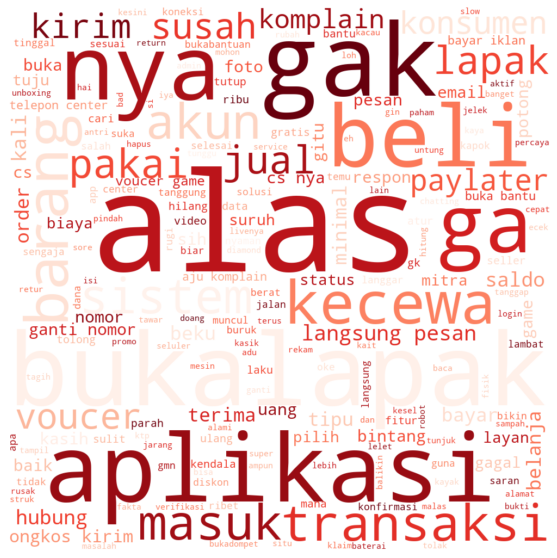

In [236]:
all_text_s0 = ' '.join(word for word in train_s0["Ulasan_clean"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

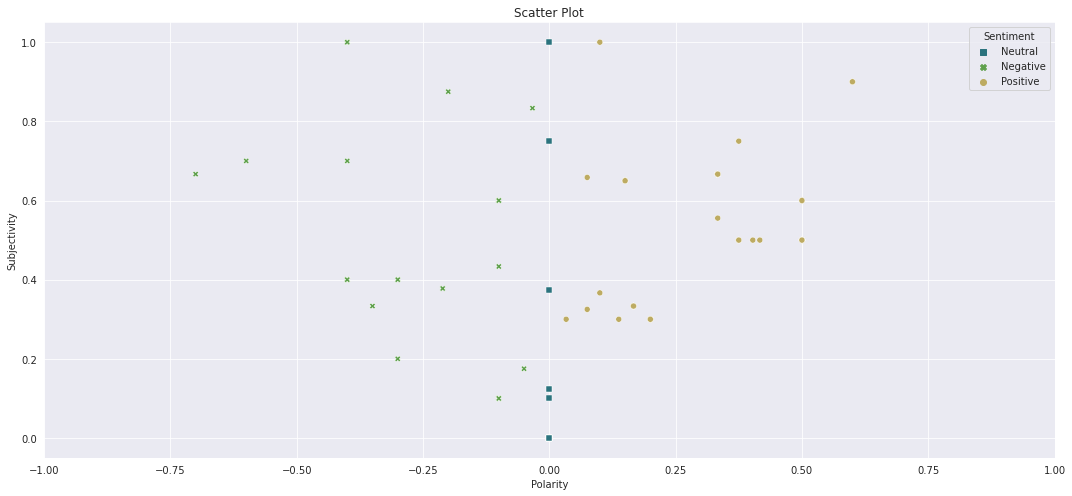

In [237]:
# Create scatter plot
sns.set_style('darkgrid')
plt.figure(figsize = (15,7))

markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}

sns.scatterplot(data=name_dataframe, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'gist_earth').set(xlim=(-1,1))
plt.title('Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.tight_layout()

In [238]:
train_s1 = data_label[data_label["Sentiment"] == 'Positive']

In [239]:
train_s1["Ulasan_clean"] = train_s1["Ulasan_clean"].fillna("tidak ada komentar")

<ipython-input-239-89653e0cae75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s1["Ulasan_clean"] = train_s1["Ulasan_clean"].fillna("tidak ada komentar")


In [240]:
train_s1

,Nama pengguna,Ulasan_clean,Sentiment
7,Media A.C,sdh blanja online beli sellertoko bayar cod be...,Positive
14,JFR,gila iya paylater bukalapak make beli pulsa ri...,Positive
84,Zaviar Abrori,ta kasih soale kesel banget kemarin pas buka a...,Positive
105,kim kimahari,aplikasi ok banget kadang jual gak sesuai bara...,Positive
111,andi Feby Cantika mulyadi,paylater bukalapak cekik kali pakai paylater b...,Positive
...,...,...,...
1266,naufal riza,mantap proses cepat pokok top,Positive
1277,rahmat hidayat,cocok belanja butuh mndesakbisa order brag pda...,Positive
1283,hery siswanto,bukalapak tukang tipusaya belanja voucer googl...,Positive
1287,bejo jo,ok bantu banget terima kasih bukalapak lapak k...,Positive


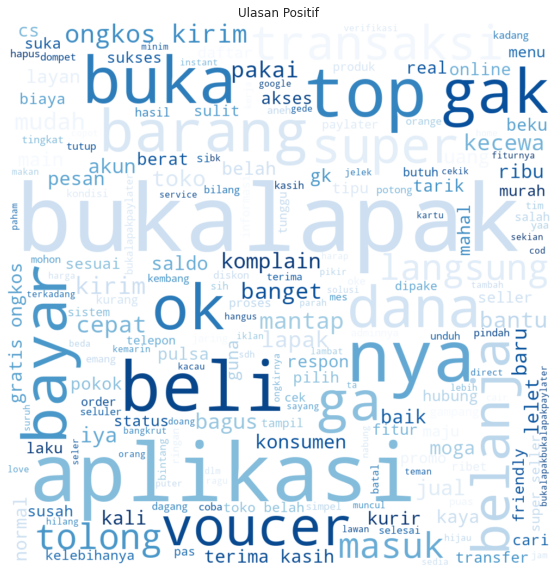

In [241]:
all_text_s1 = ' '.join(word for word in train_s1["Ulasan_clean"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ulasan Positif")
plt.margins(x=0, y=0)
plt.show()

In [242]:
data_label['Ulasan_clean'] = data_label['Ulasan_clean'].fillna("tidak ada komentar")

<ipython-input-242-27b828896519>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label['Ulasan_clean'] = data_label['Ulasan_clean'].fillna("tidak ada komentar")


In [243]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_label['Ulasan_clean'], data_label['Sentiment'], 
                                                    test_size=0.1, stratify=data_label['Sentiment'], random_state=30)

In [244]:
import numpy as np

In [245]:
from sklearn.feature_extraction.text import TfidfVectorizer             #menghitung n menjumlah kan dan menjumlah kan tf and n berdasarkan seluruh dokumen 
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [246]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(1170, 3347)
(130, 3347)


In [247]:
X_train = X_train.toarray()

In [248]:
print(*X_train, sep = "\n")

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0.3540784 0.        0.        ... 0.        0.        0.       ]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0.         0.22122332 0.         ... 0.         0.         0.        ]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.

In [249]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [250]:
X_test = X_test.toarray()

In [251]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [252]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#deklarasi metode cross validation
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)
#tuning hyperparameter menggunakan gridsearch

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gscv_nb = GridSearchCV(estimator=nb, 
                 param_grid=params_NB, 
                 cv=cv_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 

#Fitting ke Model
gscv_nb.fit(X_train,y_train)
#mendapatkan hyperparameters terbaik
gscv_nb.best_params_

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


{'var_smoothing': 0.0004328761281083057}

In [253]:
nb = GaussianNB(var_smoothing=1.0) # untuk tidak overviting

In [254]:
nb.fit(X_train, y_train)

GaussianNB(var_smoothing=1.0)

In [255]:
y_pred_nb = nb.predict(X_test)

In [256]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [257]:
print(y_train)

823     Neutral
465     Neutral
297     Neutral
827     Neutral
751     Neutral
         ...   
804     Neutral
730     Neutral
611     Neutral
105    Positive
399     Neutral
Name: Sentiment, Length: 1170, dtype: object


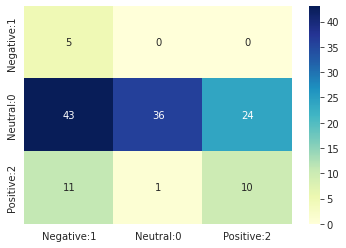

In [258]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Negative:1', 'Neutral:0', 'Positive:2'], 
                                 index=['Negative:1', 'Neutral:0', 'Positive:2'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [259]:
cm = confusion_matrix(y_test, y_pred_nb)

In [260]:

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 5  0  0]
 [55 39 22]
 [ 3  0  6]]


In [261]:
print('--------------------- confusion matrix  ----------------------------')
print(confusion_matrix(y_test, y_pred_nb))
print('--------------------- classification report  ----------------------------')
print(classification_report(y_test, y_pred_nb))

--------------------- confusion matrix  ----------------------------
[[ 5  0  0]
 [55 39 22]
 [ 3  0  6]]
--------------------- classification report  ----------------------------
              precision    recall  f1-score   support

    Negative       0.08      1.00      0.15         5
     Neutral       1.00      0.34      0.50       116
    Positive       0.21      0.67      0.32         9

    accuracy                           0.38       130
   macro avg       0.43      0.67      0.32       130
weighted avg       0.91      0.38      0.48       130



In [262]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score


In [263]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [264]:
# Regresi Logistik
logreg = LogisticRegression()
# SVM
svm = SVC(probability=True)

In [265]:
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train)


SVC(probability=True)

In [266]:
y_pred1_logreg = logreg.predict(X_test)
y_pred1_svm = svm.predict(X_test)

In [267]:
print('---------------  Regresi Logistik  -------------------')
print(classification_report(y_test, y_pred1_logreg))
print('--------------------- SVM ----------------------------')
print(classification_report(y_test, y_pred1_svm))

---------------  Regresi Logistik  -------------------
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         5
     Neutral       0.90      1.00      0.95       116
    Positive       0.00      0.00      0.00         9

    accuracy                           0.89       130
   macro avg       0.30      0.33      0.32       130
weighted avg       0.80      0.89      0.84       130

--------------------- SVM ----------------------------
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         5
     Neutral       0.90      1.00      0.95       116
    Positive       1.00      0.11      0.20         9

    accuracy                           0.90       130
   macro avg       0.63      0.37      0.38       130
weighted avg       0.87      0.90      0.86       130



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat